# 15.5 Case Study: Multiple Linear Regression with the California Housing Dataset
* [**California Housing dataset**](http://lib.stat.cmu.edu/datasets) bundled with scikit-learn 
* **Larger real-world dataset** 
    **20,640 samples**, each with **eight numerical features**
	* Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297. Submitted to the StatLib Datasets Archive by Kelley Pace (kpace@unix1.sncc.lsu.edu). [9/Nov/99]. 
* Perform **multiple linear regression** using **all eight numerical features** 
    * Make **more sophisticated housing price predictions** than if we were to use only a **single feature** or a **subset of the features**
* **`LinearRegression`** estimator performs **multiple linear regression** by default

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.5.1 Loading the Dataset (1 of 3)
* According to the California Housing Prices dataset’s description in scikit-learn
> "This dataset was **derived from the 1990 U.S. census**, using **one row per census block group**.  
>  
> "A **block group** is the **smallest geographical unit** for which the U.S. Census Bureau publishes sample data (typically has a **population of 600 to 3,000 people**)."

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.5.1 Loading the Dataset (2 of 3)
* The dataset has **20,640 samples**—**one per block group**—with **eight features** each:
	* **median income**—in tens of thousands, so 8.37 would represent $83,700
	* **median house age**—in the dataset, the maximum value for this feature is 52
	* **average number of rooms** 
	* **average number of bedrooms** 
	* **block population**
	* **average house occupancy**
	* **house block latitude**
	* **house block longitude**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.5.1 Loading the Dataset (3 of 3)
* **Target** &mdash; **median house value** in hundreds of thousands, so 3.55 would represent \$355,000
    * **Maximum** for this feature is**&nbsp;5** for **\$500,000** 
* Reasonable to expect **more bedrooms**, **more rooms** or **higher income** would mean **higher house value**
* **Combine all numeric features to make predictions**
    * More likely to get **more accurate predictions** than with simple linear regression

### Loading the Data 
* Use `sklearn.datasets` function **`fetch_california_housing`** 
* We added `%matplotlib inline` to enable Matplotlib in this notebook.

In [1]:
%matplotlib inline
from sklearn.datasets import fetch_california_housing

In [3]:
california = fetch_california_housing()  # Bunch object 
# class sklearn.utils.Bunch(**kwargs)
# Container object exposing keys as attributes.

# Bunch objects are sometimes used as an output for functions and methods. 
# They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute,
# bunch.value_key.
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html

/Users/sevbanbuyer/PycharmProjects/pythonProject/.venv/lib/python3.12/site-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

### Displaying the Dataset’s Description

In [5]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

* Confirm number of **samples/features**, number of **targets**, **feature names**

In [6]:
california.data.shape

(20640, 8)

In [7]:
california.target.shape

(20640,)

In [8]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## 15.5.2 Exploring the Data with a Pandas 

In [9]:
import pandas as pd

In [15]:
pd.set_option('display.precision', 4)  # 4 digit precision for floats

In [ ]:
# Used for command line outputs in IPython interactive mode
#pd.set_option('max_columns', 9)  # display up to 9 columns in DataFrame outputs

#pd.set_option('display.width', None)  # auto-detect the display width for wrapping

* Second statement adds a **`DataFrame` column** for **median house values**

In [16]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [17]:
california_df['MedHouseValue'] = pd.Series(california.target)

## 15.5.2 Exploring the Data with a Pandas (cont.)

In [18]:
california_df.head()  # peek at first 5 rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


## 15.5.2 Exploring the Data with a Pandas `DataFrame` (cont.)
* Calculate **`DataFrame`’s summary statistics** 
* Median income and house values are from 1990 and are **significantly higher today** 
* Output is **left-to-right scrollable in Jupyter** if it does not fit in your screen width

In [19]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


## 15.5.3 Visualizing the Features 
* Helpful to **visualize** data by **plotting the target value** against **each** feature
    Shows how **median home value** relates to **each feature**
* To make our visualizations clearer, let’s use **`DataFrame` method **`sample`**** to **randomly select 10% of the 20,640 samples** for graphing

In [20]:
sample_df = california_df.sample(frac=0.1, random_state=17)

* Display **scatter plots** of several **features** 
* Each shows **feature** on **x-axis** and **median home value** on **y-axis**

In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

In [ ]:
# sns.set(font_scale=2)

In [23]:
sns.set_style('whitegrid')                                    

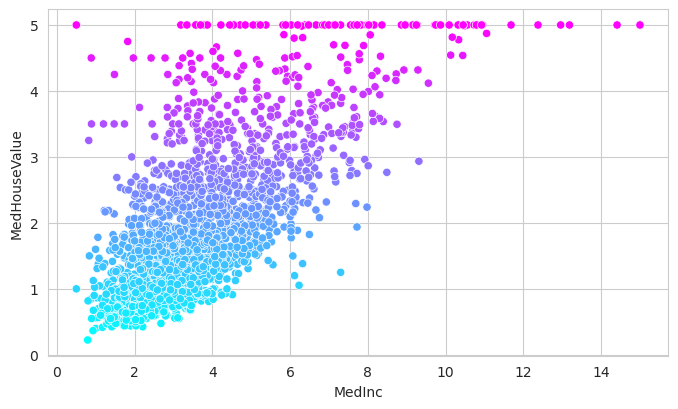

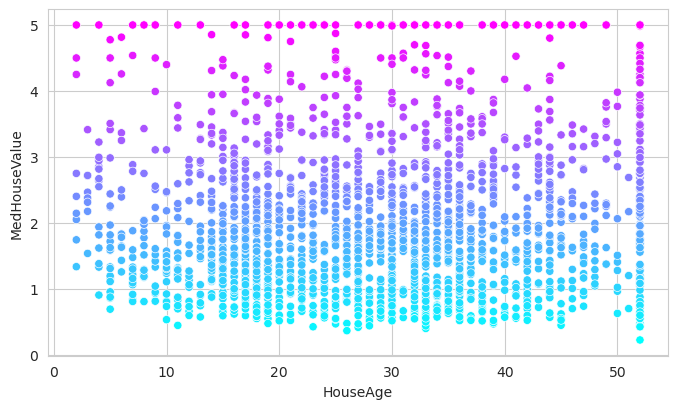

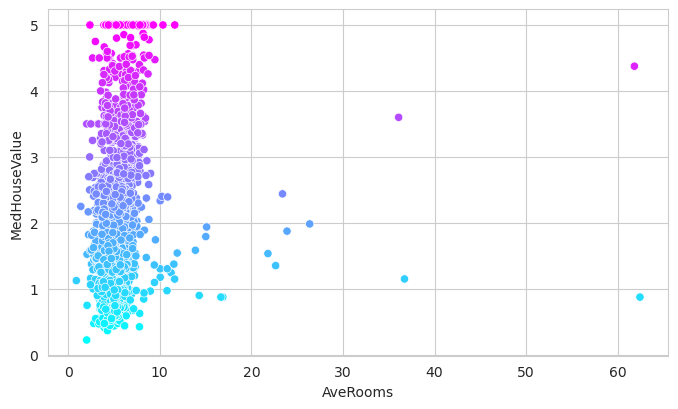

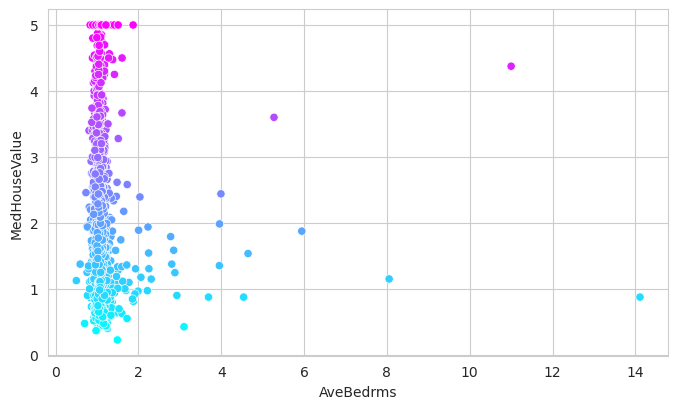

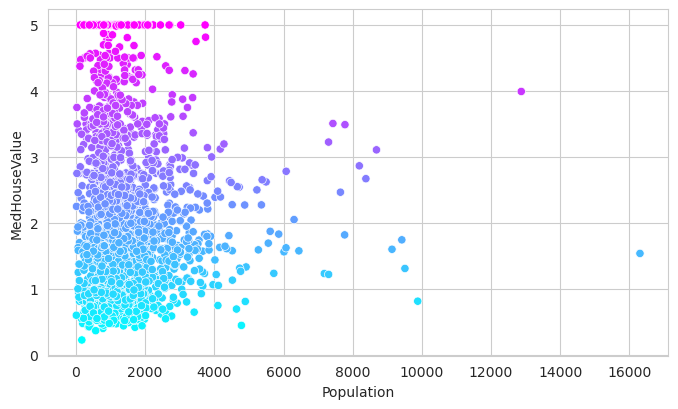

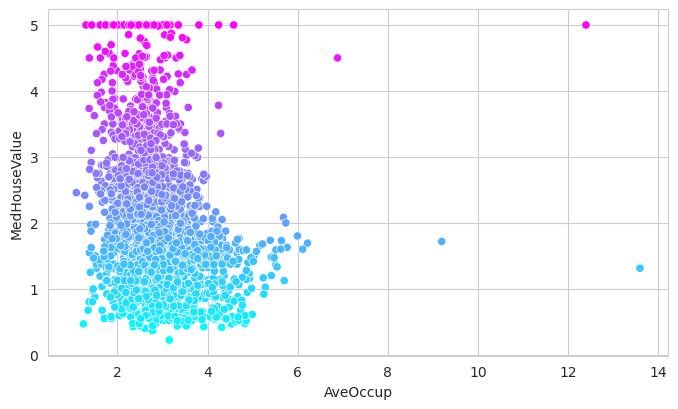

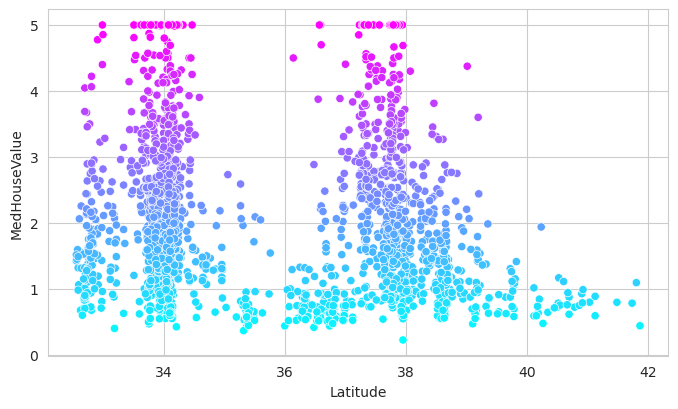

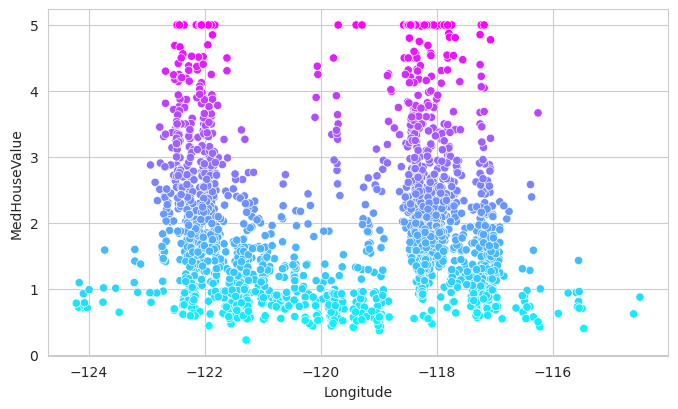

In [24]:
for feature in california.feature_names:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature, 
                    y='MedHouseValue', hue='MedHouseValue', 
                    palette='cool', legend=False)

Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude
        
MedHouseValue - the real value of the house

## 15.5.3 Visualizing the Features (cont.)
* Some **interesting things** to notice in these graphs:
	* **Latitude and longitude graphs** each have **two areas** of especially significant density&mdash;**greater Los Angeles** and **greater San Francisco** areas where house prices tend to be higher
    * Each graph shows a **horizontal line of dots at the y-axis value 5**, which represents the [**maximum median house value \$500,000** listed in the 1990 census form](https://www.census.gov/prod/1/90dec/cph4/appdxe.pdf)
    * **`HouseAge` graph** shows a **vertical line of dots** at the **x-axis value 52**
        * **Highest home age** on the 1990 census form was **52**

<!-- ![California Housing Dataset scatterplot of Median House Value vs. Median Income](./ch14images/medincome.png "California Housing Dataset scatterplot of Median House Value vs. Median Income")
 ![California Housing Dataset scatterplot of Median House Value vs. House Age](./ch14images/houseage.png "California Housing Dataset scatterplot of Median House Value vs. House Age")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Rooms](./ch14images/averooms.png "California Housing Dataset scatterplot of Median House Value vs. Average Rooms")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Bedrooms](./ch14images/avebedrooms.png "California Housing Dataset scatterplot of Median House Value vs. Average Bedrooms")
 ![California Housing Dataset scatterplot of Median House Value vs. Population](./ch14images/population.png "California Housing Dataset scatterplot of Median House Value vs. Population")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Occupancy](./ch14images/aveoccupancy.png "California Housing Dataset scatterplot of Median House Value vs. Average Occupancy")
 ![California Housing Dataset scatterplot of Median House Value vs. Lattitude](./ch14images/lattitude.png "California Housing Dataset scatterplot of Median House Value vs. Lattitude")
 ![California Housing Dataset scatterplot of Median House Value vs. Longitude](./ch14images/longitude.png "California Housing Dataset scatterplot of Median House Value vs. Longitude")<hr style="height:2px; border:none; color:black; background-color:black;"> -->

## 15.5.4 Splitting the Data for Training and Testing Using `train_test_split`  

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    california.data, california.target, random_state=11)

In [27]:
X_train.shape

(15480, 8)

In [28]:
X_test.shape

(5160, 8)

## 15.5.5 Training the Model 
* **`LinearRegression`** tries to use **all** features in a dataset’s `data` array
    * **error** if any features are **categorical**  
    * Categorical data must be preprocessed into numerical data or excluded
* **Scikit-learn’s bundled datasets** are already in the **correct format** for training

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
linear_regression = LinearRegression()

In [31]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

## 15.5.5 Training the Model (cont.)
* **Separate coefficients** for each feature (stored in `coeff_`) and **one intercept** (stored in `intercept_`) 
    * **Positive coefficients** &mdash; median house value **increases** as feature value **increases** 
    * **Negative coefficients** &mdash; median house value **decreases** as feature value **increases**
    * **HouseAge**, **AveOccup** and **Population** are **close to zero**, so these apparently have little to no affect on **median house value**

In [32]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')  

    MedInc: 0.4377030215382207
  HouseAge: 0.009216834565797779
  AveRooms: -0.10732526637360972
 AveBedrms: 0.6117133073918096
Population: -5.756822009302152e-06
  AveOccup: -0.003384566465716297
  Latitude: -0.41948186096490647
 Longitude: -0.4337713349874014


In [33]:
linear_regression.intercept_

-36.88295065605547

## 15.5.5 Training the Model (cont.)
* Can use coefficient values in following equation to **make predictions**:

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

* <em>m</em><sub>1</sub>, <em>m</em><sub>2</sub>, …, <em>m</em><sub><em>n</em></sub> are the **feature coefficients**
* <em>b</em> is the **intercept**
* <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub>, …, <em>x</em><sub><em>n</em></sub> are **feature values** (the **independent variables**)
* <em>y</em> is the **predicted value** (the **dependent variable**)
   

## 15.5.6 Testing the Model 
* Use the estimator’s `predict` method 

In [34]:
predicted = linear_regression.predict(X_test)

In [35]:
expected = y_test

In [36]:
predicted[:5]  # first 5 predictions

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [37]:
expected[:5]   # first five targets 

array([0.762, 1.732, 1.125, 1.37 , 1.856])

## 15.5.6 Testing the Model with the Estimator’s `predict `Method (cont.)
* In **classification**, **predictions** were **distinct classes** that **matched existing classes** in the dataset
* In **regression**, it’s **tough to get exact predictions**, because you have **continuous outputs**
    * Every possible value of <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub> … <em>x</em><sub><em>n</em></sub> in the following calculation predicts a value

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}


## 15.5.7 Visualizing the Expected vs. Predicted Prices 
* Create a `DataFrame` containing columns for the expected and predicted values:

In [38]:
df = pd.DataFrame()

In [39]:
df['Expected'] = pd.Series(expected)

In [40]:
df['Predicted'] = pd.Series(predicted)

## 15.5.7 Visualizing the Expected vs. Predicted Prices (cont.)
* Plot the data as a scatter plot with the **expected (target) prices** along the x-axis and the **predicted prices** along the **y**-axis: 

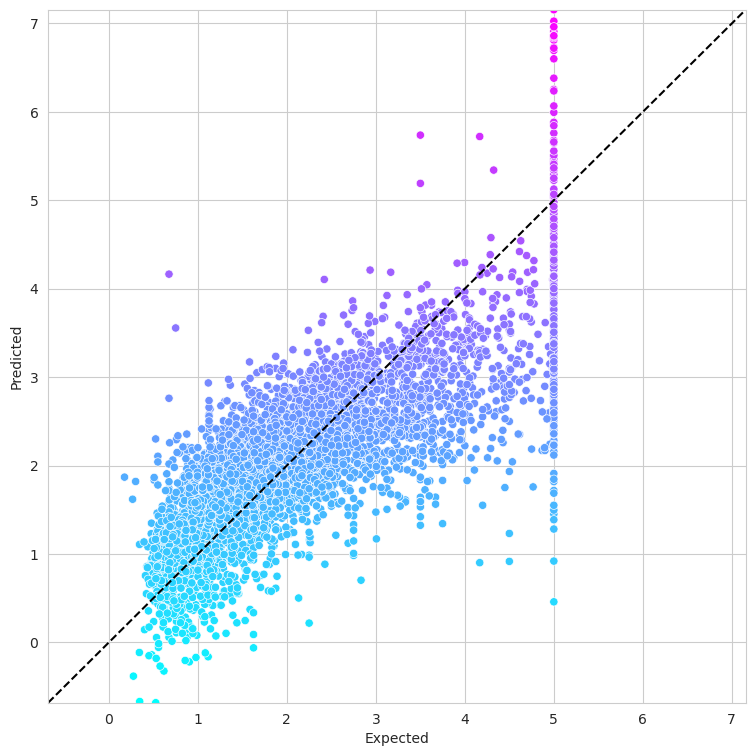

In [42]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
    hue='Predicted', palette='cool', legend=False)

# hue parameter takes column name for colour encoding


# let’s set the x-and y-axes’ limits to use the same scale along both axes:

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--') # this line draws the black dashed line 
# This line represents perfect predictions (note that this is not a regression line).

## 15.5.7 Visualizing the Expected vs. Predicted Prices (cont.)
* Set the **<em>x</em>**- and **<em>y</em>**-axes’ limits to use the same scale along both axes:
* Plot a line that represents **perfect predictions** (this is **not** a regression line). 
    * The call to **`plot`** displays a line between the points representing the lower-left corner of the graph (`start, start`) and the upper-right corner of the graph (`end, end`). 
    * The third argument (`'k--'`) indicates the line’s style. 
    * The letter `k` represents the color black, and the `--` indicates that plot should draw a dashed line: 
* If every predicted value were to match the expected value, then all the dots would be plotted along the dashed line. 
* Appears that as the expected median house value increases, more of the predicted values fall below the line. 
* So the model **seems to predict** lower median house values as the **expected** median house value increases. 


## 15.5.8 Regression Model Metrics
* **Metrics for regression estimators** include **coefficient of determination** (**$R^{2}$ score**; 0.0-1.0)
    * **1.0** &mdash; estimator **perfectly predicts** the **dependent variable’s value**, given independent variables' values
    * **0.0** &mdash; **model cannot make predictions with any accuracy**, given independent variables’ values 
* Calculate with arrays representing the **expected** and **predicted results**

In [43]:
from sklearn import metrics

In [44]:
metrics.r2_score(expected, predicted)

0.6008983115964327

## 15.5.9 Choosing the Best Model
* **Try several estimators** to determine whether any **produces better results** than `LinearRegression` 
* [Information about estimators used here](https://scikit-learn.org/stable/modules/linear_model.html)

In [45]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [46]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

## 15.5.9 Choosing the Best Model (cont.)
* Run the estimators using **k-fold cross-validation** 
* **`cross_val_score` argument `scoring='r2'`** &mdash; report **$R^{2}$ scores** for **each fold**
    * **1.0 is best**, so **`LinearRegression`** and **`Ridge`** appear to be **best models** for this dataset

In [47]:
from sklearn.model_selection import KFold, cross_val_score

In [48]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=california.data, y=california.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' + 
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599
